In [1]:
# import the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from pylab import rcParams

# style the charts
rcParams['figure.figsize'] = 10, 5
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 100
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

# style the tables
pd.set_option("display.max_rows",15)
pd.set_option("display.max_columns",15)

# read all the CSV files one by one and store them in a list
dfs = []

for i in range(1, 8):
    dfs.append(pd.read_csv("../data/PM_estimation/SKOMOBO-dust" + str(i) +".csv", index_col=0, parse_dates=True))

# join up all the dataframes in the list into one huge dataframe
all_data = pd.concat(dfs)

# change the index so that it is based on the date and time and rearrange the columns so that equipment ID comes first
# variable and value
all_data = all_data.set_index(pd.DatetimeIndex(all_data.DT.values))[["EQM_ID", "variable", "value"]]

In [2]:
# extract the PM10 dustrack data and store it
DustTrackPM10 = all_data[all_data["EQM_ID"] == "PM10DT"]

# extract the PM2.5 dustrack data and store it
DustTrackPM2_5 = all_data[all_data["EQM_ID"] == "PM2.5DT"]

# create a list of box names like SKOMOBO, SKOMOBO1, SKOMOBO2 etc
ids = ["SKOMOBO"] + ["SKOMOBO" + str(i) for i in range(1, 8)]

# extract all the skomobos data
Skomobos = all_data[all_data["EQM_ID"].isin(ids)]

# isolate PM10 data and PM2.5 data
SkomoboPM10 = Skomobos[Skomobos["variable"] == "PM10"]
SkomoboPM2_5 = Skomobos[Skomobos["variable"] == "PM2.5"]

In [3]:
SkomoboPM10["value"] = SkomoboPM10["value"] / 1000
SkomoboPM2_5["value"] = SkomoboPM2_5["value"] / 1000

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
# join the dataframes
comparisonPM10 = SkomoboPM10.join(DustTrackPM10["value"], rsuffix="_dustrack").dropna()[["EQM_ID", "value", "value_dustrack"]]
comparisonPM2_5 = SkomoboPM2_5.join(DustTrackPM2_5["value"], rsuffix="_dustrack").dropna()[["EQM_ID", "value", "value_dustrack"]]

# change column names
comparisonPM10 = comparisonPM10.rename(columns={"value": "skomobo", "value_dustrack": "dustrack"})
comparisonPM2_5 = comparisonPM2_5.rename(columns={"value": "skomobo", "value_dustrack": "dustrack"})
comparisonPM10

,EQM_ID,skomobo,dustrack
2017-05-12 17:31:00,SKOMOBO,0.000,0.011
2017-05-12 17:32:00,SKOMOBO,0.000,0.012
2017-05-12 17:33:00,SKOMOBO,0.000,0.013
2017-05-12 17:34:00,SKOMOBO,0.000,0.013
2017-05-12 17:35:00,SKOMOBO,0.001,0.012
2017-05-12 17:36:00,SKOMOBO,0.001,0.009
2017-05-12 17:37:00,SKOMOBO,0.001,0.011
...,...,...,...
2017-07-13 11:59:00,SKOMOBO6,0.512,0.039
2017-07-13 12:00:00,SKOMOBO1,19.712,0.036


In [6]:
from sklearn.ensemble import IsolationForest

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
trainPM10, testPM10 = train_test_split(comparisonPM10)

In [31]:
PM10OutlierDetector = IsolationForest(contamination=0.18).fit(trainPM10["skomobo"].values.reshape(-1, 1))

# train on a train test split

In [32]:
trainPM10["is_inlier"] = PM10OutlierDetector.predict(trainPM10["skomobo"].values.reshape(-1, 1))
testPM10["is_inier"] = PM10OutlierDetector.predict(testPM10["skomobo"].values.reshape(-1, 1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
len(trainPM10[trainPM10["is_inlier"] == 1]["skomobo"]) / float(len(trainPM10["skomobo"]))

0.8194940830752124

In [36]:
len(testPM10[testPM10["is_inlier"] == 1]["skomobo"]) / float(len(testPM10["skomobo"]))

0.8202638711022426

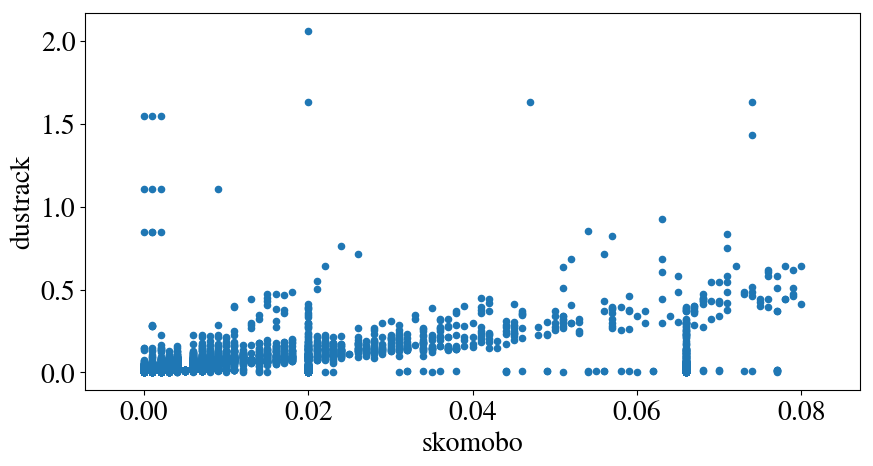

In [34]:
trainPM10[trainPM10["is_inlier"] == 1].plot(x="skomobo", y="dustrack", kind="scatter")

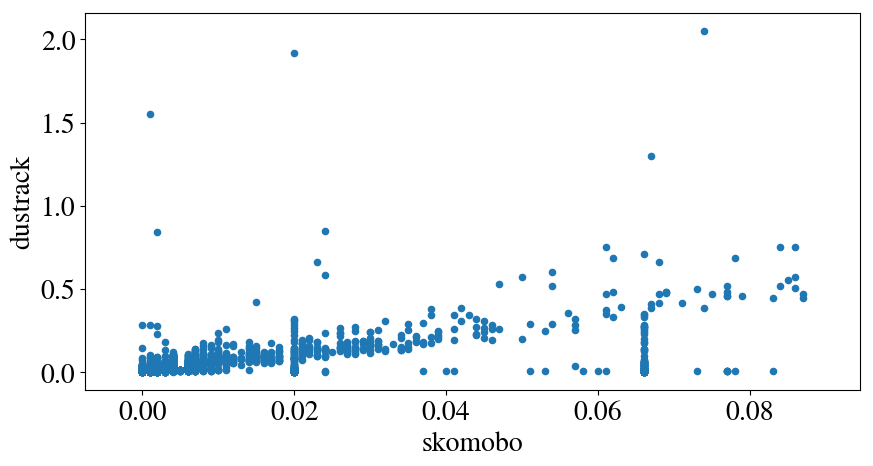

In [37]:
testPM10[testPM10["is_inlier"] == 1].plot(x="skomobo", y="dustrack", kind="scatter")

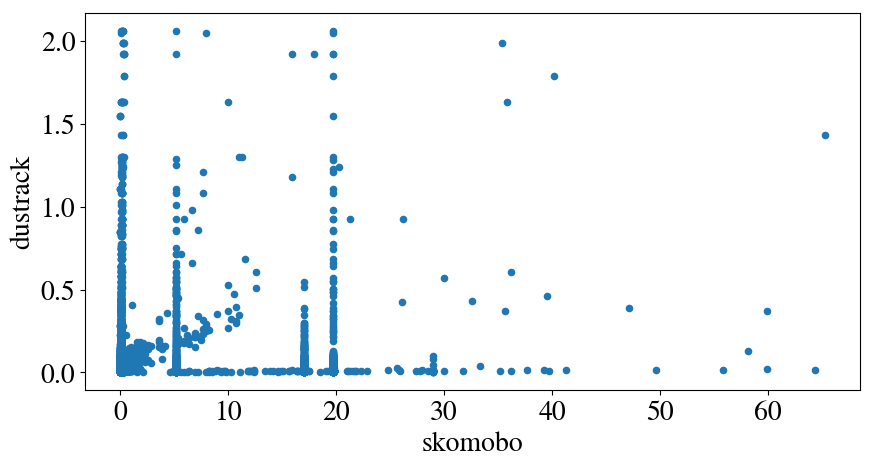

In [35]:
trainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

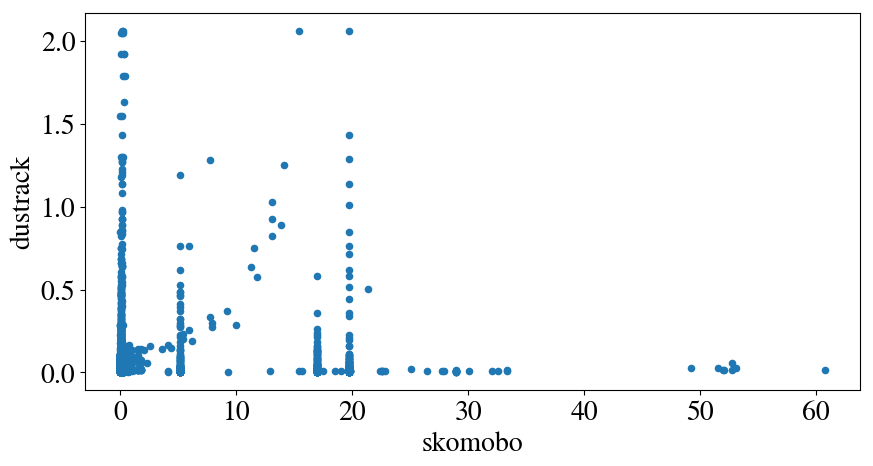

In [38]:
testPM10.plot(x="skomobo", y="dustrack", kind="scatter")